<a href="https://colab.research.google.com/github/A01795331/estefania/blob/main/Actividad9RLog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 9**
Regresión Logística

---

*   NOMBRE: José Antonio Hernández Hernández
*   MATRÍCULA: A01381334
*   NOMBRE: Estefanía Amaya Rojas
*   MATRÍCULA: A01795331
*   NOMBRE: Diego Alí López Álvarez
*   MATRÍCULA: A00817381
*   NOMBRE: Carlos Mariano Ramírez Amaya
*   MATRÍCULA: A01795036

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/CAyD/ActiveClass9"
os.chdir(DIR)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [ ]:
data_df = pd.read_csv('data.csv')
data_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# **Parte 1**. EDA

Haz que el `id` sea el índice del dataframe y efectúa una exploración inicial de los datos a través de:

In [ ]:
data_df.set_index('id', inplace=True)



1a) Estadísticas descriptivas para todas las variables del dataframe.

In [ ]:
# Para variables numéricas redondeamos a dos decimales
numerical_stats = data_df.describe().round(2)

# Para variables categóricas usamos include=['object']
categorical_stats = data_df.describe(include=['object'])

# Imprimir las estadísticas descriptivas de las variables numéricas
print("Estadísticas Descriptivas para Variables Numéricas:")
print(numerical_stats)

# Imprimir las estadísticas descriptivas de las variables categóricas
print("\nEstadísticas Descriptivas para Variables Categóricas:")
print(categorical_stats)


Estadísticas Descriptivas para Variables Numéricas:
       radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
count       569.00        569.00          569.00     569.00           569.00   
mean         14.13         19.29           91.97     654.89             0.10   
std           3.52          4.30           24.30     351.91             0.01   
min           6.98          9.71           43.79     143.50             0.05   
25%          11.70         16.17           75.17     420.30             0.09   
50%          13.37         18.84           86.24     551.10             0.10   
75%          15.78         21.80          104.10     782.70             0.11   
max          28.11         39.28          188.50    2501.00             0.16   

       compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
count            569.00          569.00               569.00         569.00   
mean               0.10            0.09                 0.05         

1b) Valores únicos por variable para identificar posibles variables categóricas.

In [ ]:
# Contar los valores únicos en cada columna del DataFrame
unique_values = data_df.nunique()

# Imprimir los valores únicos por cada columna
print(unique_values)

diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: int64


**Solo la variable categórica 'diagnosis tiene 2 valores (M = maligno, B = benigno)**

1c) Búsqueda de valores faltantes.

In [ ]:
# Contar los valores faltantes en cada columna del DataFrame
missing_values = data_df.isnull().sum()

# Imprimir la cantidad de valores faltantes por columna
print(missing_values)


diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


1d) Diagrama de barras para determinar la frecuencia de los diagnósticos (cantidad de observaciones con resultado benigno y maligno)

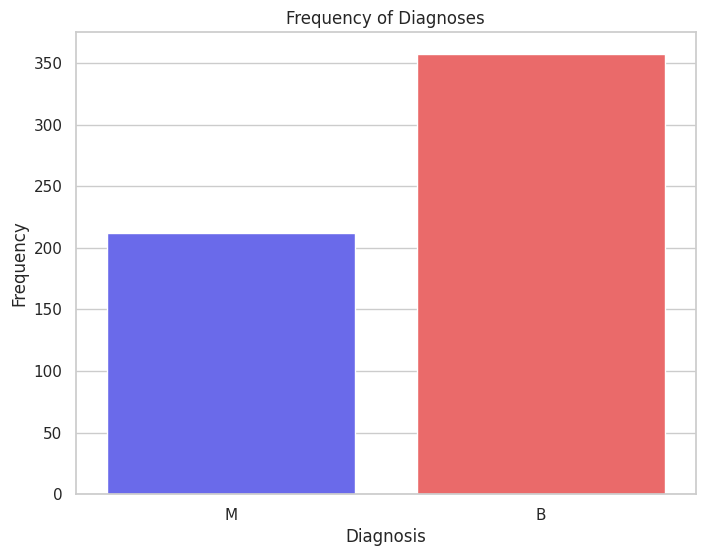

In [ ]:
# Configuramos gráficos de seaborn
sns.set(style="whitegrid")

# Creamos el diagrama de barras para la columna 'diagnosis'
plt.figure(figsize=(8, 6))  # Puedes ajustar el tamaño según tus necesidades
ax = sns.countplot(x='diagnosis', data=data_df, palette='seismic')
plt.title('Frequency of Diagnoses')
plt.xlabel('Diagnosis')
plt.ylabel('Frequency')
plt.show()


2. Como hay tres valores relacionados con la misma característica (`mean`, `se` y `worst`) es muy probable que exista multicolinealidad en el conjunto.

La multicolinealidad en regresión es una condición que ocurre cuando algunas variables predictoras están fuertemente correlacionadas entre sí, de tal manera que si se incluyen simultáneamente en un modelo, impiden explicar de manera correcta el efecto que cada una tiene sobre la variable respuesta. Existen muchas formas de analizar si hay colinealidad en los modelos, una de ellas es el alto coeficiente de correlación entre variables.

Para observar este efecto, elabora un mapa de calor que cuantifique la correlación de las variables numéricas en el dataframe.

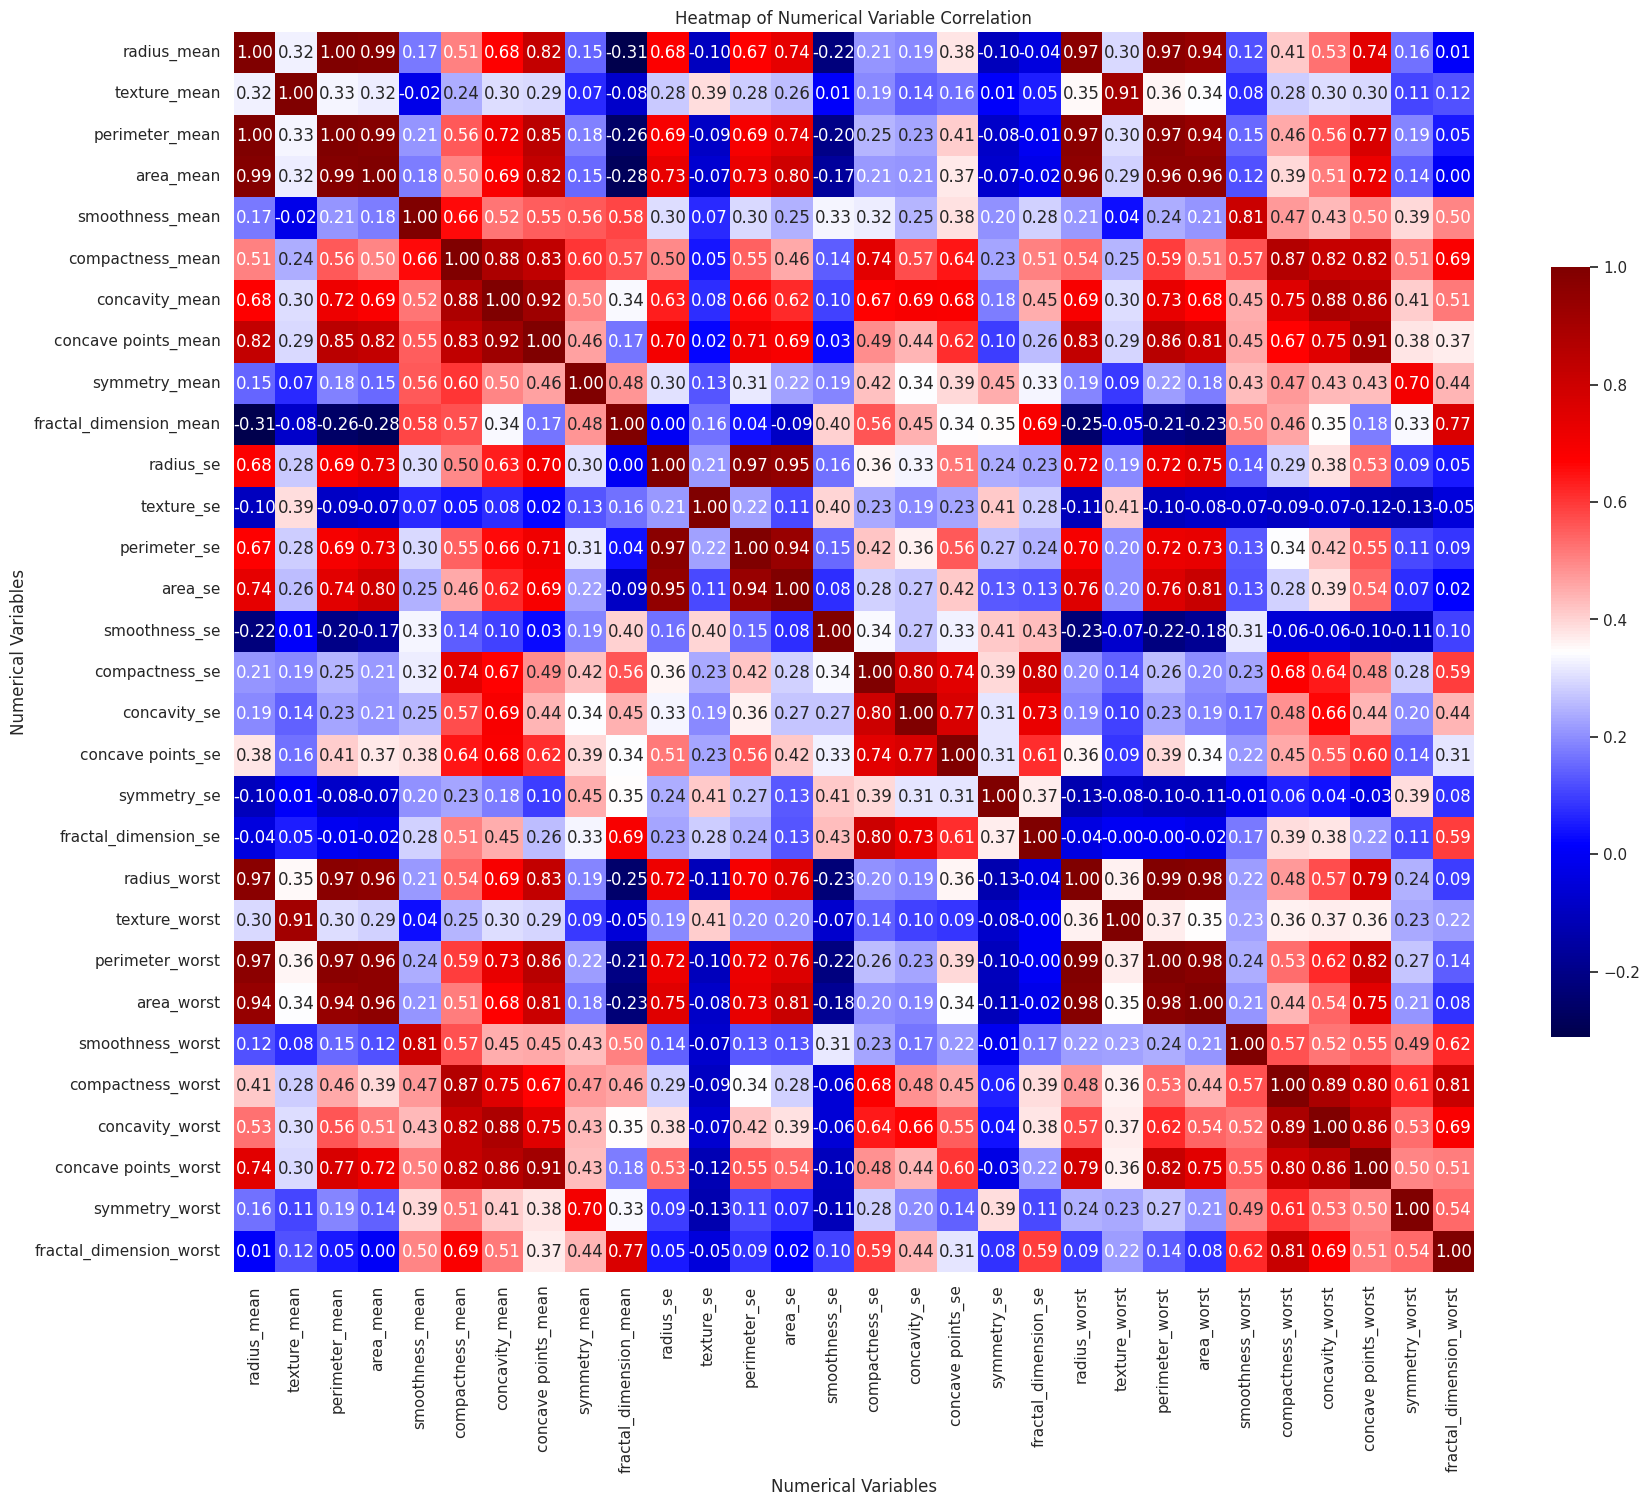

In [ ]:
# Aseguramos de seleccionar solo columnas numéricas para la matriz de correlación
numerical_data_df = data_df.select_dtypes(include=[np.number])

# Calculamos la matriz de correlación para las variables numéricas
correlation_matrix = numerical_data_df.corr()

plt.figure(figsize=(20, 20))

# Creamos el mapa de calor usando seaborn
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='seismic', square=True, cbar_kws={'shrink': .5})

# Añadimos títulos y etiquetas para hacerlo más informativo
plt.title('Heatmap of Numerical Variable Correlation')
plt.xlabel('Numerical Variables')
plt.ylabel('Numerical Variables')
plt.show()



Si te fijas en los valores de correlación entre las variables `_mean` y `_worst` es evidente la multicolinearidad.

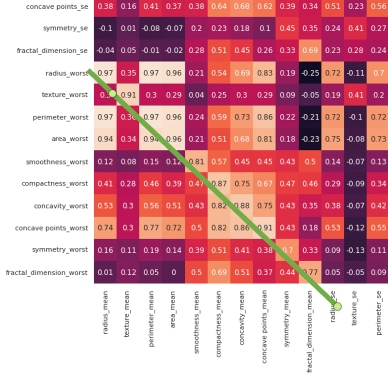

Por ejemplo, la columna `radius_mean` tiene una correlación de 0.97 con la columna `radius_worst`. Esto es algo inevitable, porque las columnas "peores" son esencialmente solo un subconjunto de las columnas "medias".

Para solucionar el problema numérico de la multicolinealidad, tradicionalmente se recurre a eliminar variables o efectuar análisis de componentes principales (PCA) con las `X`’s y usar los componentes como variables independientes en un modelo final.

Conduciremos esta actividad en esos dos sentidos.


# **Parte 2**. Modelo con eliminación de variables altamente correlacionadas  

Elimina las variables altamente correlacionadas:

3a) Ahora que sabes que las variables `_mean` y `_worst` tienen correlación alta, hay que quitar del dataframe un conjunto. Borra las columnas `_worst`.

In [ ]:
# Lista de columnas que contienen '_worst' en su nombre
columns_to_drop = [column for column in data_df.columns if '_worst' in column]

# Eliminar las columnas seleccionadas del DataFrame
data_df.drop(columns_to_drop, axis=1, inplace=True)

# Ahora data_df ya no tiene las columnas con '_worst'
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    object 
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   perimeter_mean          569 non-null    float64
 4   area_mean               569 non-null    float64
 5   smoothness_mean         569 non-null    float64
 6   compactness_mean        569 non-null    float64
 7   concavity_mean          569 non-null    float64
 8   concave points_mean     569 non-null    float64
 9   symmetry_mean           569 non-null    float64
 10  fractal_dimension_mean  569 non-null    float64
 11  radius_se               569 non-null    float64
 12  texture_se              569 non-null    float64
 13  perimeter_se            569 non-null    float64
 14  area_se                 569 non-nul

3b. Entre las variables `_mean`, identifica patrones lineales con diagramas de dispersión usando:



```Python
sns.pairplot(data=data_df[['radius_mean',
        'texture_mean',
        'perimeter_mean',
        'area_mean',
        'smoothness_mean',
        'compactness_mean',
        'concavity_mean',
        'concave points_mean',
        'symmetry_mean',
        'fractal_dimension_mean']])
```




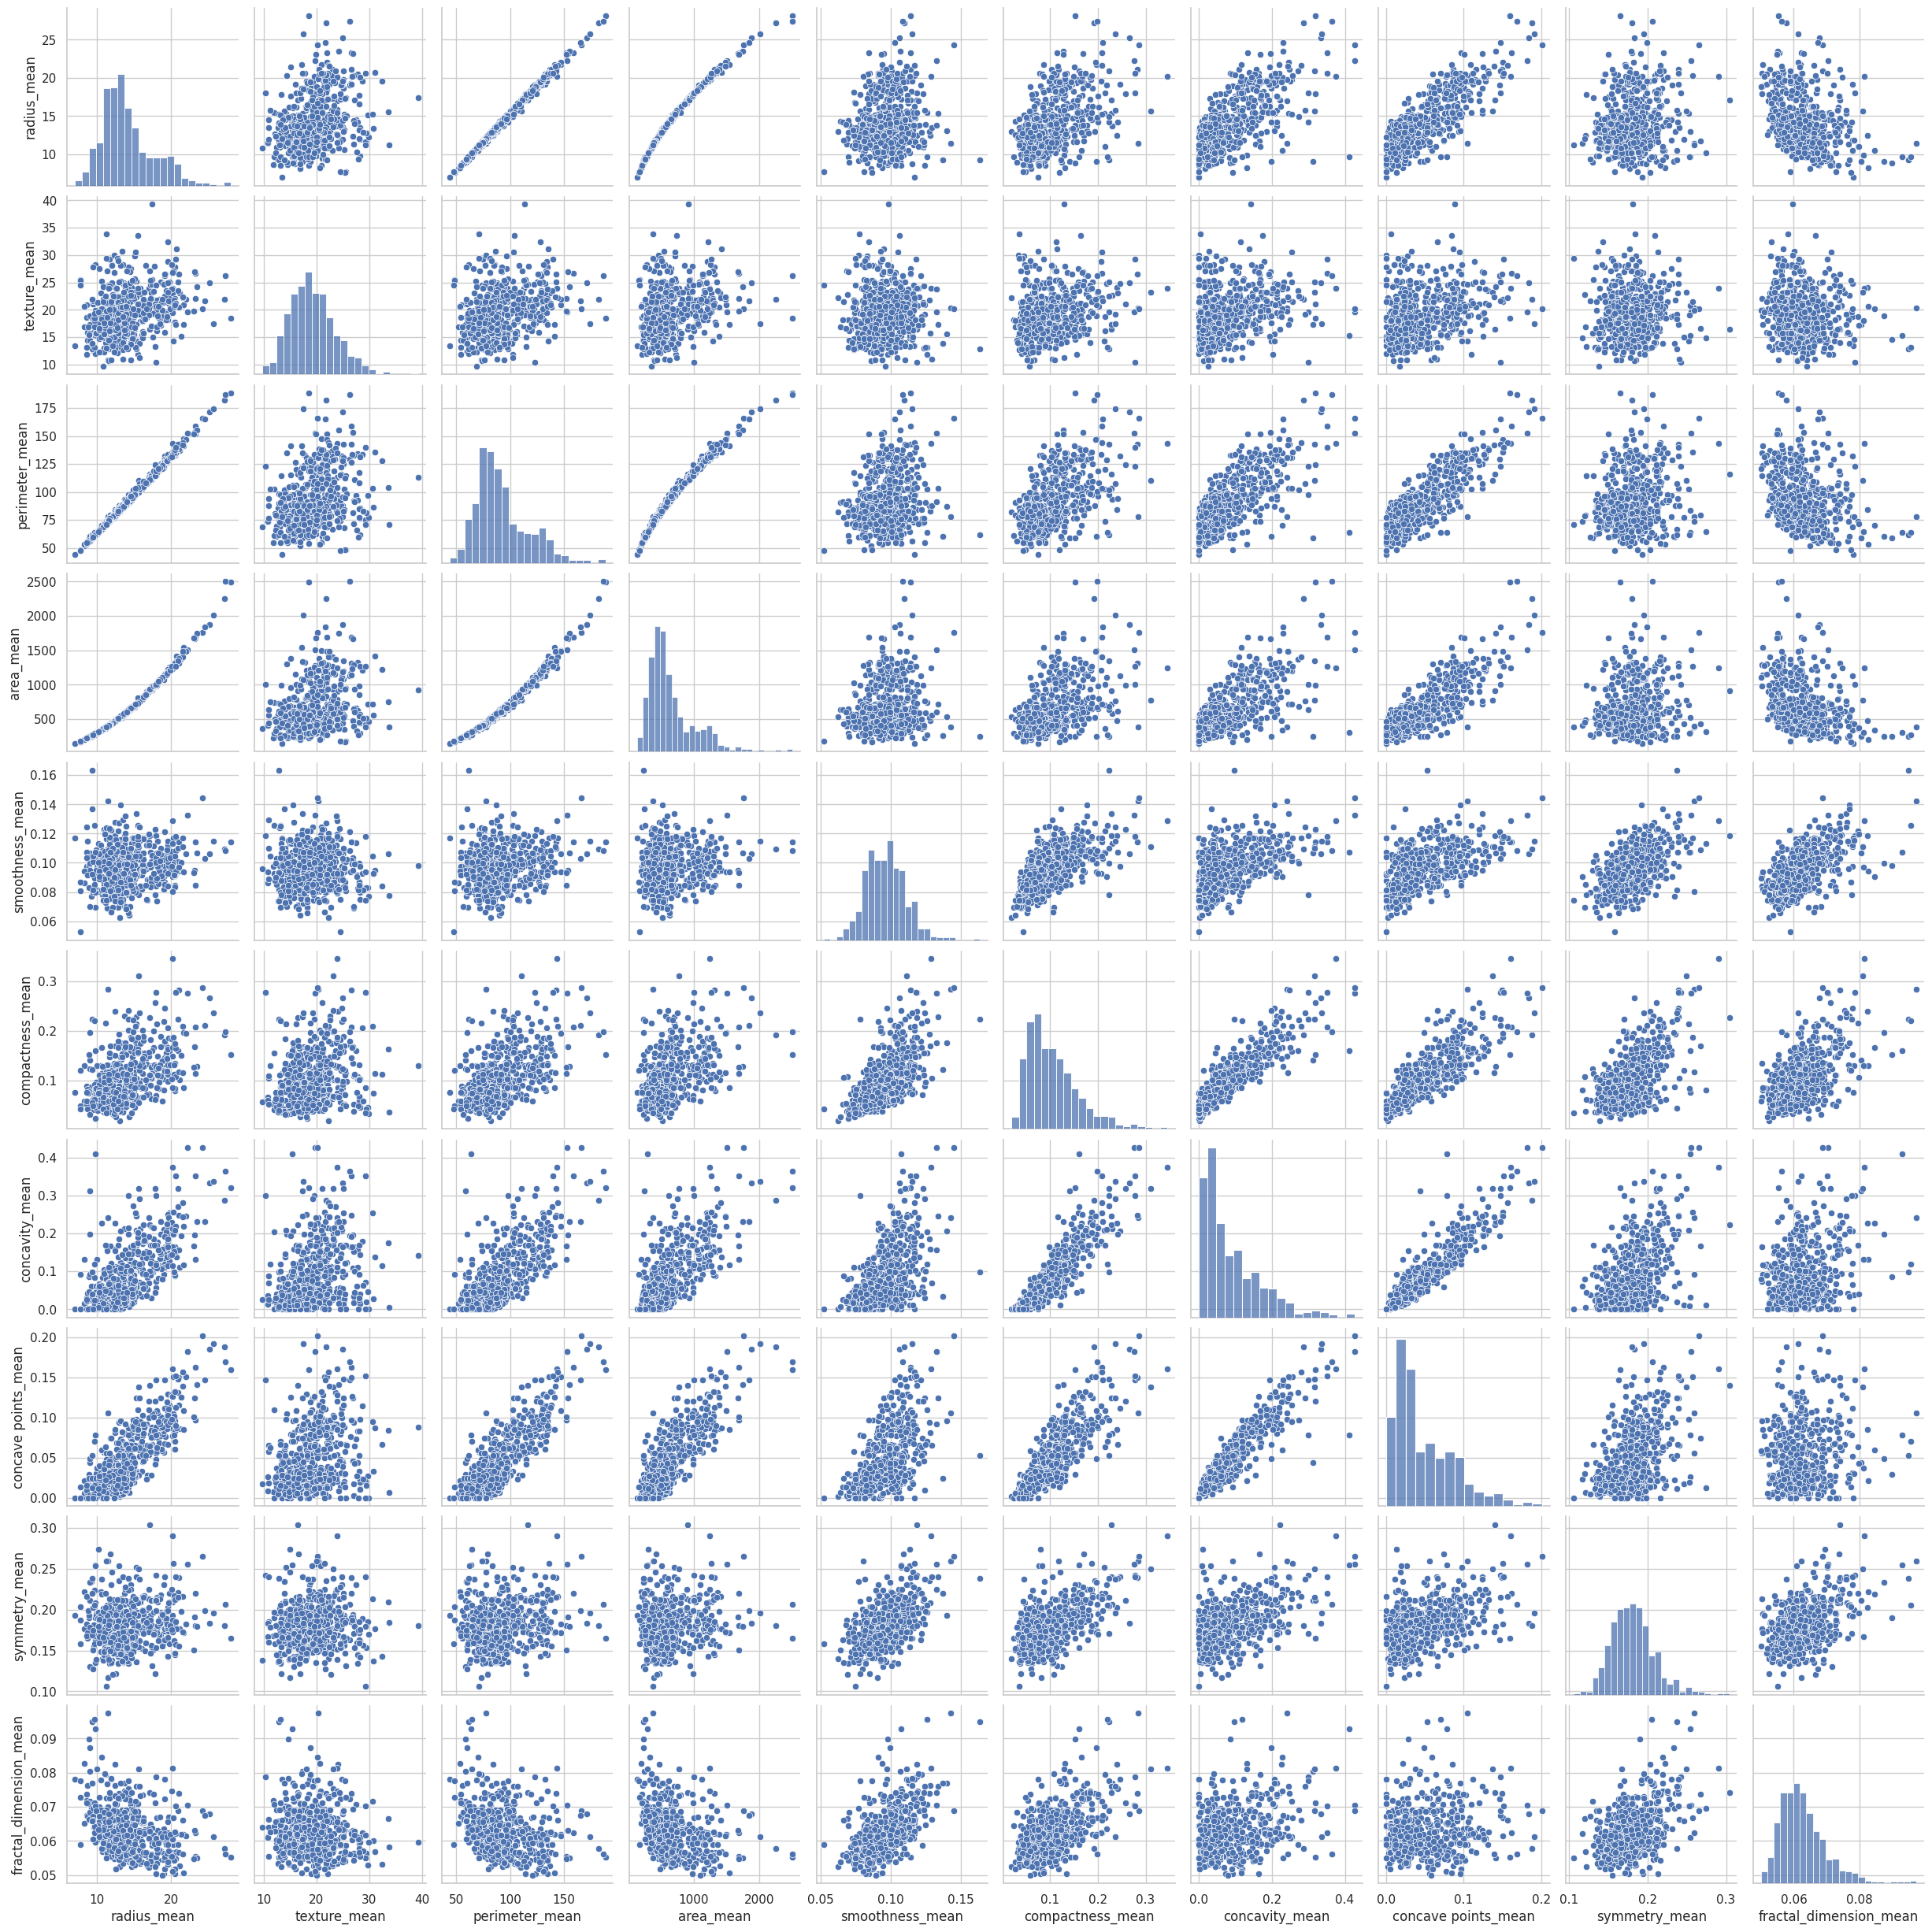

In [ ]:
sns.pairplot(data=data_df[['radius_mean',
        'texture_mean',
        'perimeter_mean',
        'area_mean',
        'smoothness_mean',
        'compactness_mean',
        'concavity_mean',
        'concave points_mean',
        'symmetry_mean',
        'fractal_dimension_mean']])

De la matriz podrás observar relaciones lineales bastante evidentes entre:


*   `radius_mean`, `perimeter_mean` y `area_mean`
*   `compactness_mean`, `concavity_mean`, `concave_points_mean`

Sabemos que el perímetro y el área de un círculo, se calculan a partir del radio. Entonces, la relación entre las primeras tres variables es muy clara para nosotros.

3c) Elabora otro mapa de calor confirmar con los valores de correlación.


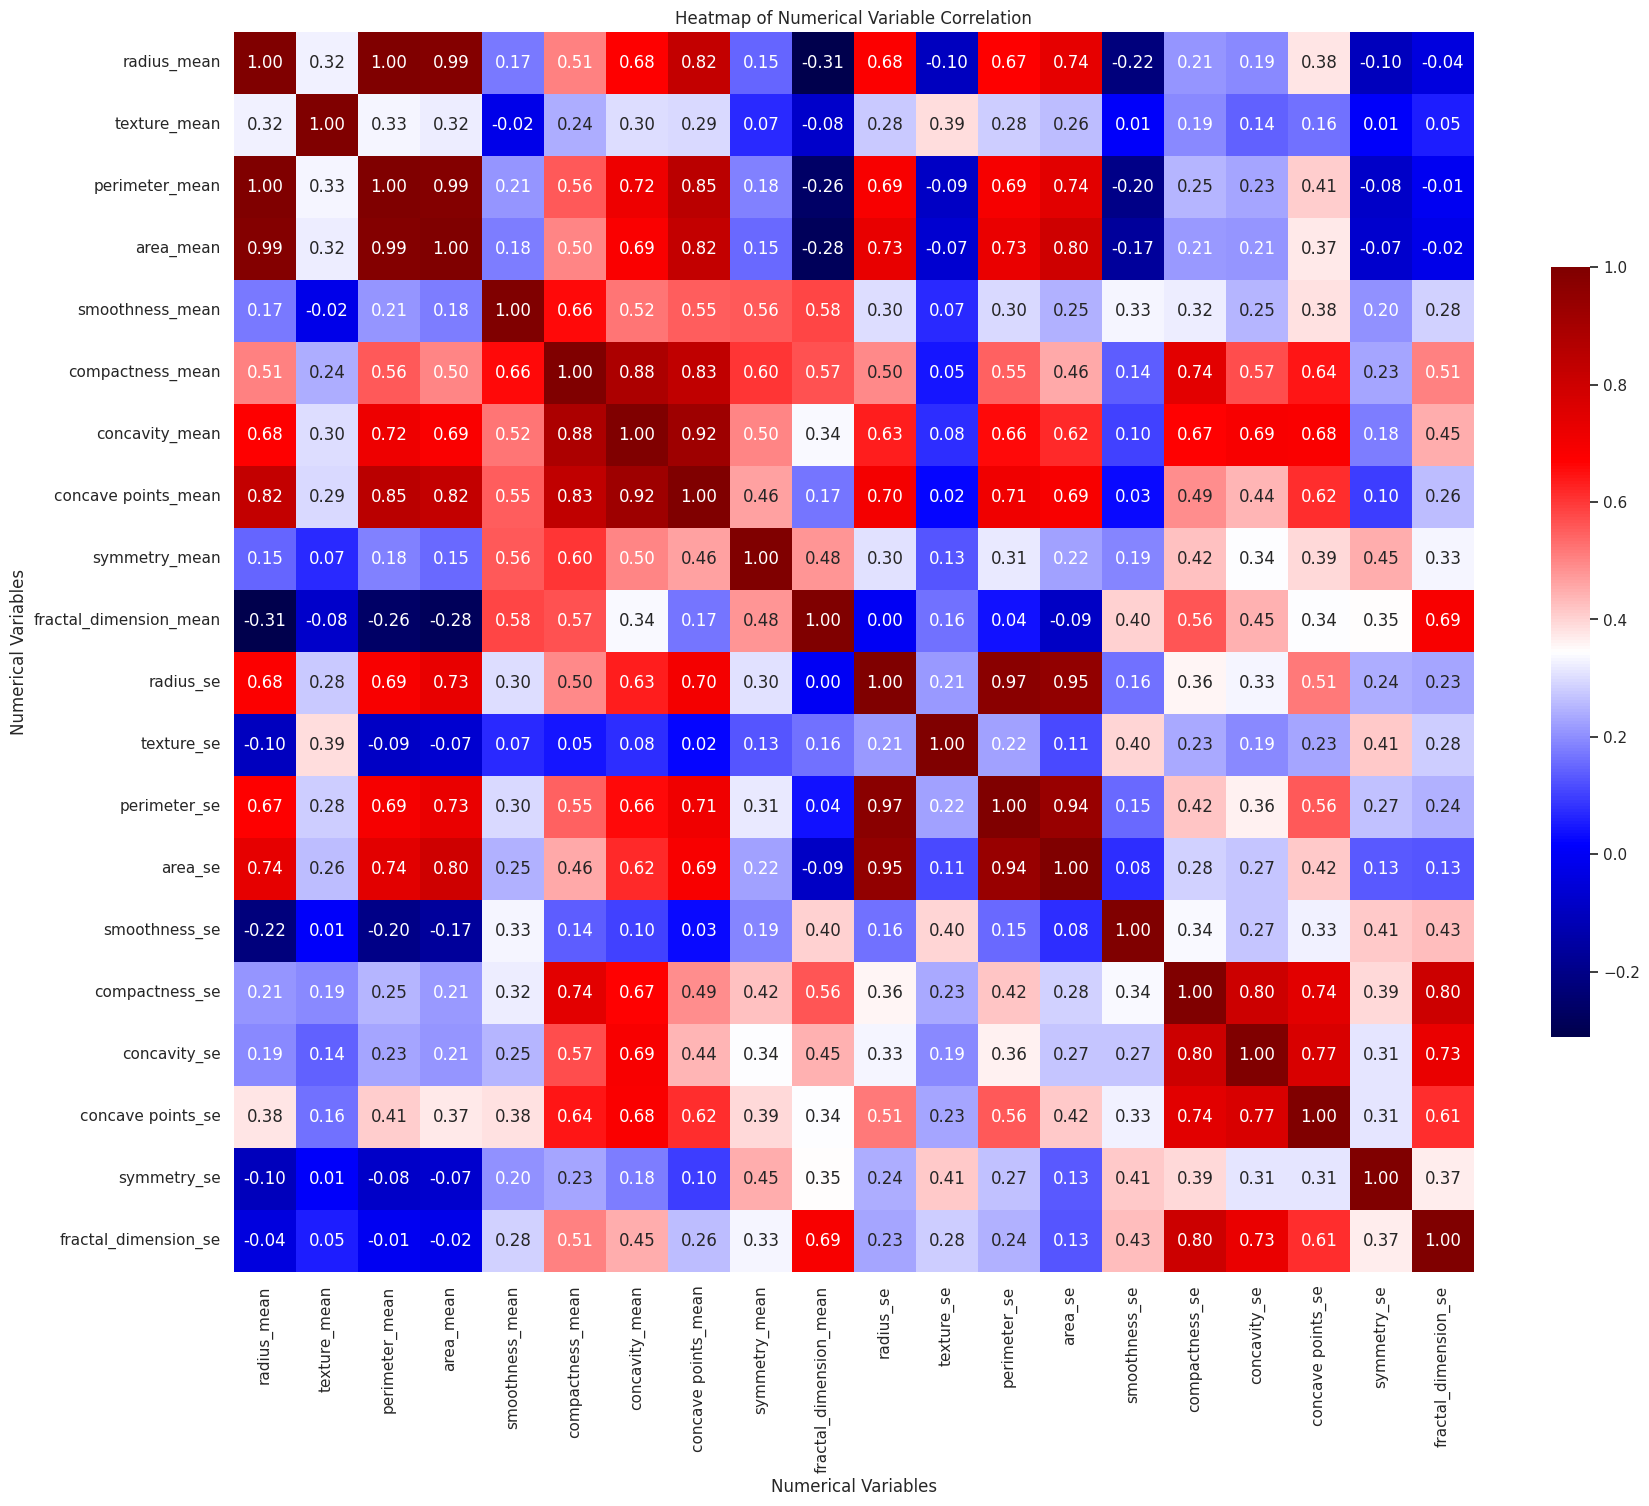

In [ ]:
# Aseguramos de seleccionar solo columnas numéricas para la matriz de correlación
numerical_data_df = data_df.select_dtypes(include=[np.number])

# Calculamos la matriz de correlación para las variables numéricas
correlation_matrix = numerical_data_df.corr()

plt.figure(figsize=(20, 20))

# Creamos el mapa de calor usando seaborn
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='seismic', square=True, cbar_kws={'shrink': .5})

# Añadimos títulos y etiquetas para hacerlo más informativo
plt.title('Heatmap of Numerical Variable Correlation')
plt.xlabel('Numerical Variables')
plt.ylabel('Numerical Variables')
plt.show()

3d) Después de observar los valores, nos quedaremos con sólo una variable de cada trío: `radius_mean` y `compactness_mean`. Elimina las restantes, no sólo del conjunto `_mean`, sino también de `_se`.

In [ ]:
# Columnas específicas que queremos eliminar
columns_to_remove = [
    'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean',
    'perimeter_se', 'area_se', 'concavity_se', 'concave points_se'
]

# Eliminar las columnas seleccionadas del DataFrame
data_df.drop(columns_to_remove, axis=1, inplace=True)
data_df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    object 
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   smoothness_mean         569 non-null    float64
 4   compactness_mean        569 non-null    float64
 5   symmetry_mean           569 non-null    float64
 6   fractal_dimension_mean  569 non-null    float64
 7   radius_se               569 non-null    float64
 8   texture_se              569 non-null    float64
 9   smoothness_se           569 non-null    float64
 10  compactness_se          569 non-null    float64
 11  symmetry_se             569 non-null    float64
 12  fractal_dimension_se    569 non-null    float64
dtypes: float64(12), object(1)
memory usage: 62.2+ KB


Observa la distribución de las variables resultantes (deben ser 12):

4a) Utilizando histogramas. Guarda en una variable (`skew_cols`) las que tengan marcado sesgo positivo. Para dar seguridad a tu selección, elige aquellas cuyo resultado de aplicar la función `skew()` sea mayor a 1.

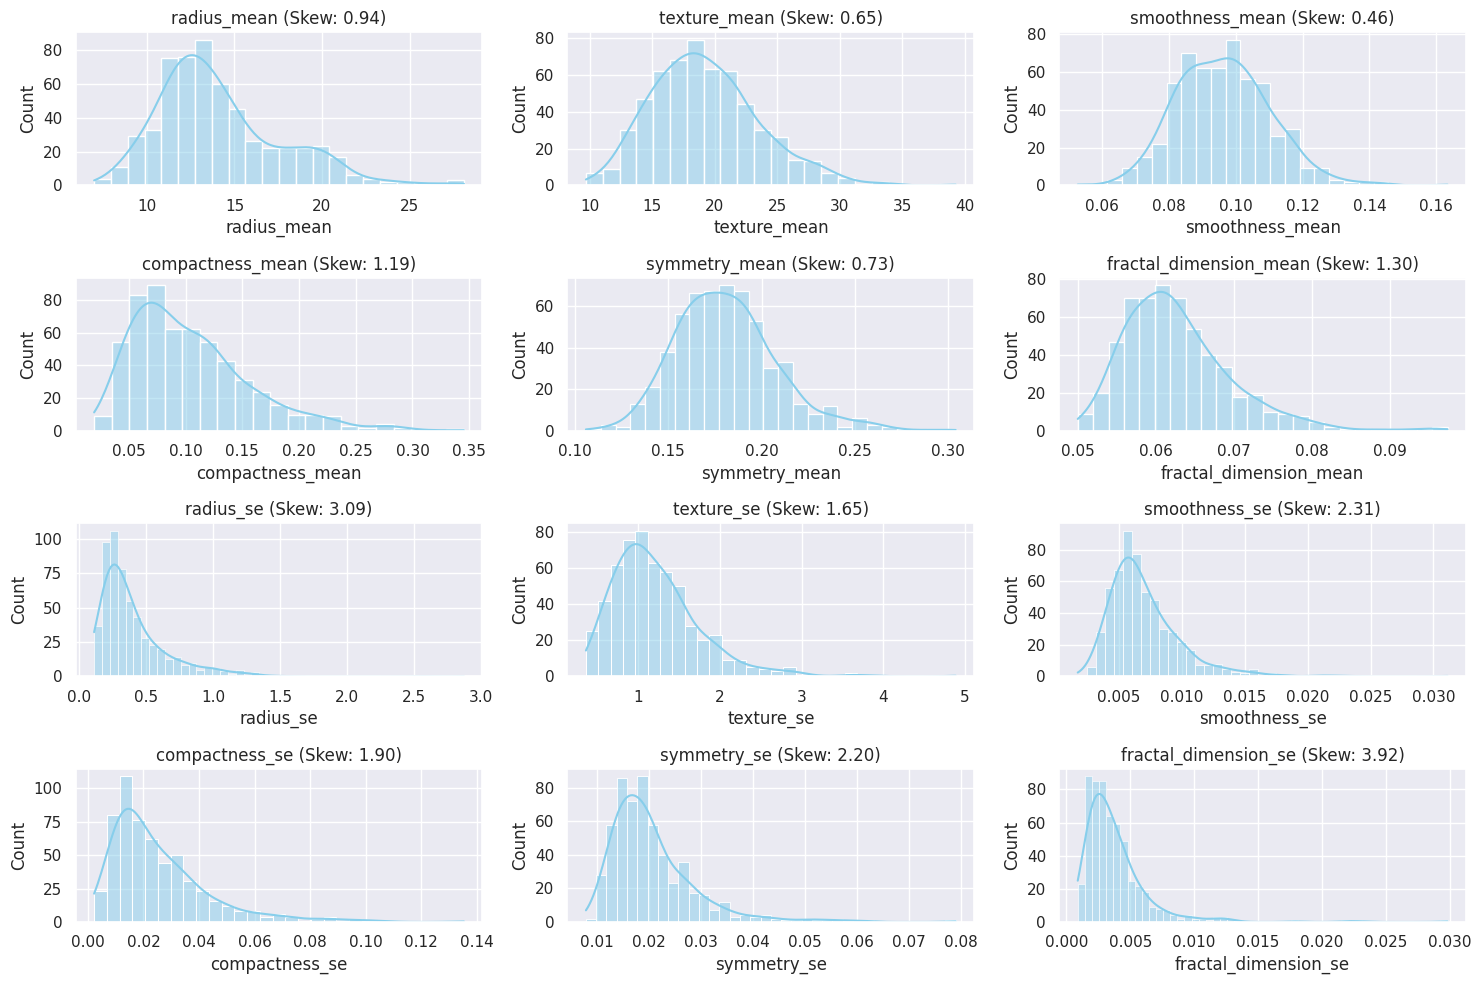

Columnas con sesgo positivo: ['compactness_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se', 'compactness_se', 'symmetry_se', 'fractal_dimension_se']


In [ ]:
# Configuramos el estilo de los gráficos
sns.set()

# Crear una figura para los subplots
fig, axes = plt.subplots(4, 3, figsize=(15, 10))
axes = axes.ravel()  # Aplanar el array de ejes para iterar fácilmente

# Inicializamos una lista vacía para guardar los nombres de las columnas con sesgo positivo
skew_cols = []

# Iterar sobre las columnas y los ejes
for i, col in enumerate(data_df.select_dtypes(include=[np.number]).columns):
    # Dibujar el histograma en el i-ésimo eje
    sns.histplot(data_df[col], ax=axes[i], kde=True, color='skyblue')

    # Calcular el sesgo
    skewness = data_df[col].skew()
    if skewness > 1:
        skew_cols.append(col)

    # Añadir título al histograma
    axes[i].set_title(f'{col} (Skew: {skewness:.2f})')

# Ajustar la distribución de los subgráficos
plt.tight_layout()

# Mostrar la figura
plt.show()

# Imprimir las columnas con sesgo positivo
print("Columnas con sesgo positivo:", skew_cols)



4b) Dibujando box plots de todas las variables. Guarda en una variable (`scale_cols`) aquellas que no se encuentren en el intervalo [0,1]


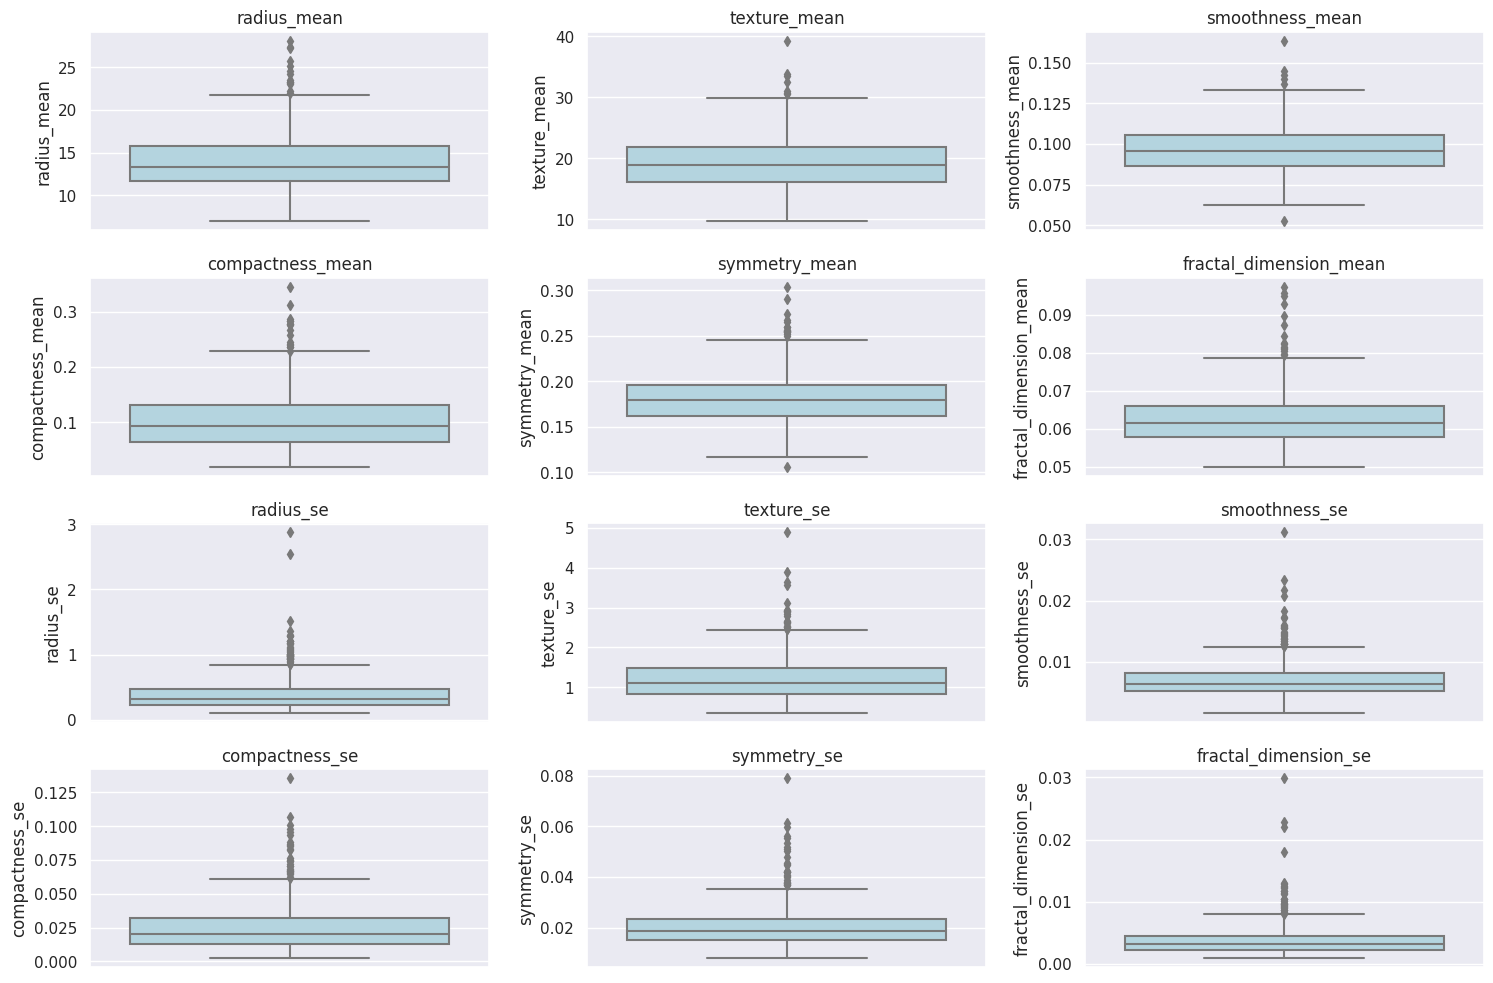

In [ ]:
# Configuramos el estilo de los gráficos
sns.set()

# Crear una figura para los subplots
fig, axes = plt.subplots(4, 3, figsize=(15, 10))
axes = axes.ravel()  # Aplanar el array de ejes para iterar fácilmente

# Iterar sobre las columnas numéricas y los ejes
for i, col in enumerate(data_df.select_dtypes(include=[np.number]).columns):
    # Dibujar el box plot en el i-ésimo eje
    sns.boxplot(y=data_df[col], ax=axes[i], color='lightblue')

    # Añadir título al box plot
    axes[i].set_title(col)

# Ajustar la distribución de los subgráficos
plt.tight_layout()

# Mostrar la figura
plt.show()


In [ ]:
# Inicializamos una lista vacía para almacenar los nombres de las columnas que tienen valores fuera del intervalo [0, 1]
scale_cols = []

# Iteramos sobre cada columna numérica
for col in data_df.select_dtypes(include=[np.number]).columns:
    # Si cualquier valor en la columna está fuera del rango [0, 1], añadimos la columna a la lista
    if not data_df[col].between(0, 1).all():
        scale_cols.append(col)

# Imprimir las columnas que que tienen valores fuera del intervalo [0, 1]
print("Columnas que que tienen valores fuera del intervalo [0, 1]:", scale_cols)

Columnas que que tienen valores fuera del intervalo [0, 1]: ['radius_mean', 'texture_mean', 'radius_se', 'texture_se']


Con todo el análisis anterior, estamos listos para generar un modelo *baseline* denominado `logr_model`. Para ello:

5a) Vuelve a leer el contenido del archivo, haz que el `id` sea el índice y separa las variables del dataframe: en `X` coloca los predictores y en `y` la variable de respuesta o salida (`diagnosis`). Divide el conjunto en entrenamiento y prueba (80:20) considerando el parámetro `random_state` con el valor de 1.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#Volvel a leer el dataframe

data_df = pd.read_csv('data.csv')
data_df.set_index('id', inplace=True)

# Definir las variables predictoras y la variable de respuesta
X = data_df.drop('diagnosis', axis=1)  # Todas las columnas excepto 'diagnosis'
y = data_df['diagnosis']  # La columna 'diagnosis'

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# Crear el modelo de regresión logística
logr_model = LogisticRegression()


5b) Prepara un transformador, denominado `preprocessing`, para borrar las columnas altamente correlacionadas (las 18 variables que se determinaron en los ejercicios previos) Asegúrate de incluir el parámetro `remainder='passthrough'` para mantener el resto de las variables.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Definir las columnas a eliminar
columns_to_drop = [
    'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean',
    'perimeter_se', 'area_se', 'concavity_se', 'concave points_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
    'smoothness_worst', 'compactness_worst', 'concavity_worst',
    'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]

# Crear el transformador para eliminar las columnas altamente correlacionadas
preprocessing = ColumnTransformer(
    transformers=[
        ('drop_columns', 'drop', columns_to_drop)
    ],
    remainder='passthrough'  # Mantener el resto de las columnas
)


5c) Entrena el modelo `logr_model` con el transformador `preprocessing` y  regresión logística.

Como la salida `y` está en términos de las etiquetas `'B'` y `'M'`, en lugar de 0 y 1, para evaluar el modelo en el conjunto de prueba deberás especificar la clase positiva. En el caso de la matriz de confusión, indica el orden de las etiquetas con `labels=['B','M']`, porque `'B'` es la clase negativa (ésta se especifica primero) y `'M'` la positiva. Para las métricas de *recall* y *precision*, utiliza el parámetro `pos_label='M'`. Como *accuracy* ocupa la suma de ambas clases y el total de las observaciones, no requiere ninguna especificación. Si quisieras omitir estos parámetros, tendrías que sustituir `'B'` por 0 y `'M'` por 1, previo a la construcción del modelo.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score

# Crear el pipeline
pipeline = Pipeline(steps=[('preprocessing', preprocessing),
                           ('classifier', LogisticRegression())])

# Entrenar el pipeline
pipeline.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred, labels=['B', 'M'])

# Calcular métricas de rendimiento
recall = recall_score(y_test, y_pred, pos_label='M')
precision = precision_score(y_test, y_pred, pos_label='M')
accuracy = accuracy_score(y_test, y_pred)

# Imprimir resultados
print("Matriz de Confusión:")
print(conf_matrix)
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")


Matriz de Confusión:
[[68  4]
 [10 32]]
Recall: 0.7619047619047619
Precision: 0.8888888888888888
Accuracy: 0.8771929824561403


Para generar un modelo `logr_model2` con transformación y escalamiento:

6a) Modifica el transformador anterior para, además del borrado de las columnas correlacionadas, aplicar la raíz cuadrada a los predictores con sesgo (previamente almacenados en `skew_cols`) y escalamiento *MinMax* a los predictores con escala mayor a 1 (previamente almacenados en `scale_cols`) Como no todos los predictores serán eliminados o transformados, asegúrate de incluir el parámetro `remainder='passthrough'`

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler

#Volvel a leer el dataframe

data_df = pd.read_csv('data.csv')
data_df.set_index('id', inplace=True)


# Definición de las columnas a eliminar
drop_columns = [
    'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean',
    'perimeter_se', 'area_se', 'concavity_se', 'concave points_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
    'smoothness_worst', 'compactness_worst', 'concavity_worst',
    'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]

# Columnas para aplicar la raíz cuadrada
skew_cols = [
    'compactness_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
    'smoothness_se', 'compactness_se', 'symmetry_se', 'fractal_dimension_se'
]

# Columnas para aplicar escalamiento MinMax
scale_cols = ['radius_mean', 'texture_mean', 'radius_se', 'texture_se']

# Transformador para la raíz cuadrada
sqrt_transformer = FunctionTransformer(np.sqrt, validate=True)

# Transformador para escalamiento MinMax
scaler = MinMaxScaler()

# Creación del transformador compuesto
logr_model2 = ColumnTransformer(
    transformers=[
        ('drop', 'drop', drop_columns), # Eliminar columnas
        ('sqrt', sqrt_transformer, skew_cols), # Aplicar raíz cuadrada
        ('scale', scaler, scale_cols) # Aplicar MinMaxScaler
    ],
    remainder='passthrough' # Mantener el resto de las columnas sin cambios
)

# El transformador logr_model2 está listo para ser utilizado en un pipeline o aplicado a un dataframe

6b) Entrena el modelo `logr_model2` con regresión logística, aplicando previamente el transformador modificado. Evalúa el modelo en el conjunto de prueba con las mismas métricas.

In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler
from sklearn.pipeline import Pipeline

# Volviendo a leer el DataFrame

data_df = pd.read_csv('data.csv')
data_df.set_index('id', inplace=True)

# Transformar la variable de respuesta
data_df['diagnosis'] = data_df['diagnosis'].map({'B': 0, 'M': 1})

# Eliminar columnas específicas
columns_to_drop = [
    'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean',
    'perimeter_se', 'area_se', 'concavity_se', 'concave points_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
    'smoothness_worst', 'compactness_worst', 'concavity_worst',
    'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]
data_df = data_df.drop(columns=columns_to_drop)

# Columnas para aplicar transformaciones específicas
skew_cols = ['compactness_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se',
             'compactness_se', 'symmetry_se', 'fractal_dimension_se']
scale_cols = ['radius_mean', 'texture_mean', 'smoothness_mean']

# Definir las transformaciones
sqrt_transformer = FunctionTransformer(func=lambda x: x**0.5, inverse_func=lambda x: x**2)
scaler = MinMaxScaler()

# Crear el transformador compuesto
preprocessor = ColumnTransformer(
    transformers=[
        ('sqrt', sqrt_transformer, skew_cols),
        ('minmax', scaler, scale_cols)
    ],
    remainder='passthrough'  # Para no afectar las demás columnas
)

# Transformar los datos
data_df_transformed = preprocessor.fit_transform(data_df)

# Transformar la variable de respuesta
data_df['diagnosis'] = data_df['diagnosis'].map({'B': 0, 'M': 1})

# Ahora data_df_transformed contiene tus datos transformados y data_df['diagnosis'] tu variable objetivo.

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    data_df_transformed,
    data_df['diagnosis'],
    test_size=0.20,
    random_state=1
)

# Entrenar un modelo de regresión logística
logr_model2 = LogisticRegression()
logr_model2.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
predictions = logr_model2.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))

ValueError: ignored

# **Parte 3**. Modelo con aplicación de PCA

7. Analizaremos el efecto de aplicar PCA a todas las variables. Recuerda que previo a aplicarlo es recomendado escalar todas las variables. Utiliza la clase `StandardScaler` para transformar `X`.

8. Aplica PCA al conjunto escalado y determina el número de componentes que explican el 99% de la varianza.

9. Con el número de componentes determinado, estamos listos para generar un modelo `logr_model3` con PCA. Construye un pipeline que incluya el escalamiento estándar, el PCA con el número de componentes determinado y regresión logística. Entrena el modelo utilizando el  conjunto de entrenamiento y evalúalo en el conjunto de prueba con las mismas métricas.

10. En un modelo de diagnóstico médico, ¿cuál consideras que es la métrica más importante? ¿Cómo cambiarías (disminuir/aumentar) el *threshold*? ¿Por qué?